In [1]:
import numpy as np
import cvxpy as cp

# Part-a
$b_{t+1} = (1+\rho )b_t-w_t$,&nbsp; $b_t\geq 0,\, \forall t$            
$P_{tj}$ is the amount investment type j pays out at time period t per
dollar invested.            
$\vec{x}$ represents the amount of dollars spent on each investment         
constraints:
1. $w+P@x \geq e$     
2. $w\geq 0$
3. $x\geq 0$
4. $b\geq 0$
5. $b_{t+1} = (1+\rho )b_t-w_t$     

Initially, we have $b_1+\vec{1}^T\vec{x}$ which is what we have to **minimise**

## It is a convex optimisation problem

### optimization function : $\min b_1+\vec{1}^T\vec{x}$
This is a linear function, we know that linear functions are convex. Therefore, the optimization function which we have to **minimize** is convex, in convex optimization problem, if the objective is to minize then the function should be convex, if maximise then concave. the constraints should be convex, which is true for all the constraints since they are linear, therefore the optimization problem is convex. 




In [2]:
# data
m = 29
n = 36

P = np.array([
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,]
])

e = np.array([
  0.000000,
  1.000000,
  2.000000,
  3.000000,
  4.000000,
  5.000000,
  6.000000,
  7.000000,
  8.000000,
  16.000000,
  16.600000,
  17.200000,
  17.800000,
  18.400000,
  19.000000,
  19.600000,
  20.200000,
  18.000000,
  17.000000,
  16.000000,
  15.000000,
  14.000000,
  13.000000,
  12.000000,
  11.000000,
  10.000000,
  9.000000,
  8.000000,
  7.000000,
  6.000000,
  5.000000,
  4.000000,
  3.000000,
  2.000000,
  1.000000,
  0.000000,
])
print(P.shape)
rho = 0.002500

(36, 29)


In [3]:
b = cp.Variable(n+1)
x = cp.Variable(m)
M = np.eye(n+1)*(1+rho)
idx = np.arange(n)
np.add.at(M,(idx,idx+1),-1)
w = (M@b)[:-1]
constraints = [ b>=0, x>=0, w>=0, w+P@x>=e]
objective = cp.Minimize(b[0]+np.ones(m)@x)
prob = cp.Problem(objective, constraints)
min_investment = prob.solve()

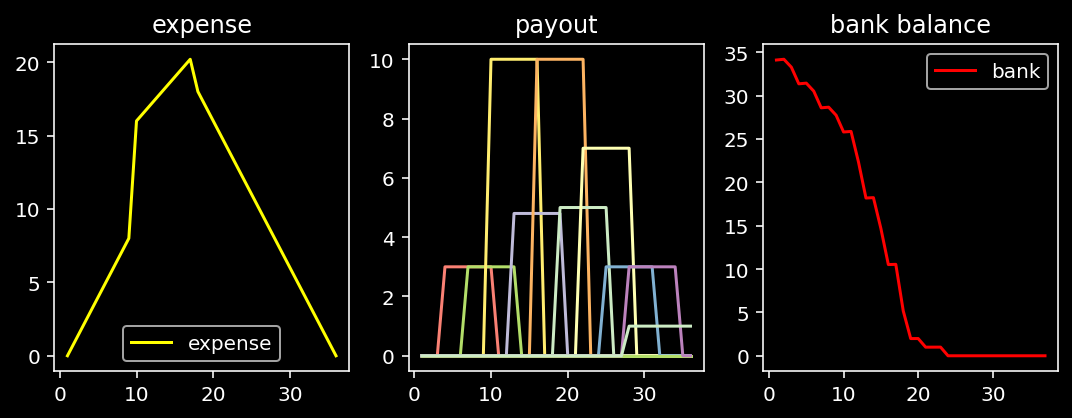

In [4]:
# import matplotlib
import matplotlib.pyplot as plt
# styling
%config InlineBackend.figure_format = 'retina' 
plt.style.use('dark_background') 

# time
t = 1+np.arange(n)
tt = 1+np.arange(n+1)
# adding subplots
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(9,3))
# expense
ax1.set_title("expense")
ax1.plot(t,e,label='expense', color='yellow')
ax1.legend()
# payout
ax2.set_title("payout")
ax2.plot(t,np.multiply(P,x.value), label=(['$m={}$'.format(i+1) for i in range(m)]))
# ax2.legend() # The legend is very big, so I commented it out

# bank balance
ax3.set_title("bank balance")
ax3.plot(tt,b.value, color='red', label='bank')
ax3.legend()

fig.savefig("plots.png")
plt.show()

In [5]:
constraints.append(x==0)
probNew = cp.Problem(objective, constraints)
min_invest_with0x = probNew.solve()
print("The minimum investment is {}, while the minimum investment with x=0 is {}".format(min_investment,min_invest_with0x))



The minimum investment is 197.91922181539286, while the minimum investment with x=0 is 336.54540329481415
